In [13]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'frequency')

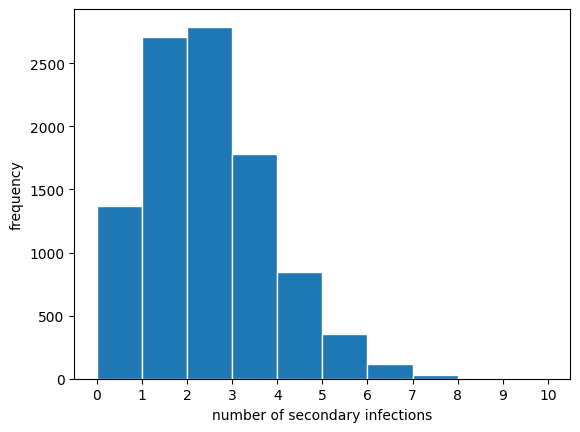

In [14]:
R0 = 2
fig,ax = plt.subplots()
draws = np.random.poisson(R0,10000)
num_bins = np.arange(np.max(draws)+1)
ax.hist(draws,edgecolor='w',bins=num_bins)
ax.set_xticks(num_bins)
ax.set_xlabel('number of secondary infections')
ax.set_ylabel('frequency')

In [15]:
def n_children_poisson(R0,n_draws):
    draws = np.random.poisson(R0,size=n_draws)
    total_children = np.sum(draws)
    return total_children

In [16]:
def sample_BP(children_function, R0, n_generations):
    z = np.zeros(n_generations, dtype=int)
    z[0] = 1
    for generation in np.arange(1,n_generations):
        z[generation] = children_function(R0,z[generation-1])
    return z

In [17]:
sample_BP(n_children_poisson, 2, 10)

array([  1,   1,   3,   4,   8,  15,  34,  59, 123, 232])

Text(0, 0.5, 'branching process size')

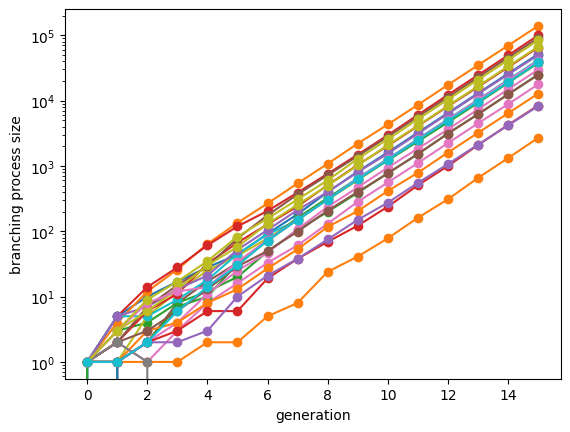

In [18]:
fig,ax = plt.subplots()

for i in range(30):
    trajectory = sample_BP(n_children_poisson,2,16)
    ax.semilogy(trajectory,'-o')
    
ax.set_xlabel('generation')
ax.set_ylabel('branching process size')